In [4]:
#The testing of Random Forest Classifier for detection of Malignant or Benign tumor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dataset=pd.read_csv('Breast Cancer data.csv')

In [7]:
dataset.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

            ...             radius_worst  texture_worst  perimeter_worst  \
0           ...                    25.38          17.33           184.60   
1           ...                    24.99          23.41           158.80   
2           ...                    23.57          25.53           152.50   
3           ...                    14.91          26.50            98.87   
4           ...                    22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 32 columns]

In [8]:
#Count the number of rows and columns
dataset.shape
#we get 569 rows and 32 columns

(569, 32)

In [9]:
#Count the number of malignant and benign data
dataset['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

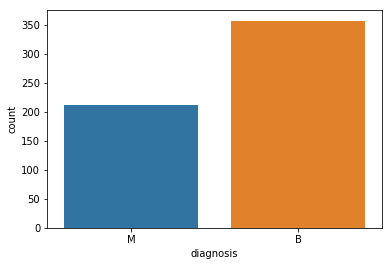

In [19]:
%matplotlib inline
sns.countplot(dataset['diagnosis'],label='count');

In [21]:
#The values of M and B must be encoded I will try to encode it to 0's and 1'
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_Y= LabelEncoder()
dataset.iloc[:,1]=labelencoder_Y.fit_transform(dataset.iloc[:,1].values)
#1 because dignosis is at index 1
print(dataset.iloc[:,1])

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
539    0
540    0
541    0
542    0
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    0
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    1
563    1
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


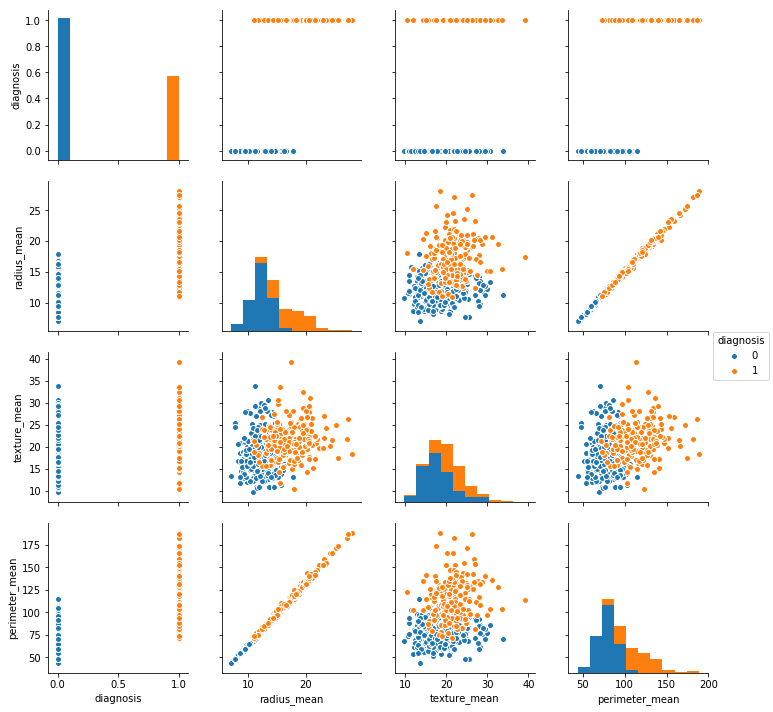

In [11]:
sns.pairplot(dataset.iloc[:,1:5],hue='diagnosis')
#visualize the other parameters with respect to the classifiaction to find 
#which parameters are most useful in predicting malignant or benign

In [8]:
#higher values indicate that the column has greater influence on prediction
#negative values show negative influence and 0 values show no influence
dataset.iloc[:,1:12].corr()

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                1.000000      0.323782        0.997855   0.987357   
texture_mean               0.323782      1.000000        0.329533   0.321086   
perimeter_mean             0.997855      0.329533        1.000000   0.986507   
area_mean                  0.987357      0.321086        0.986507   1.000000   
smoothness_mean            0.170581     -0.023389        0.207278   0.177028   
compactness_mean           0.506124      0.236702        0.556936   0.498502   
concavity_mean             0.676764      0.302418        0.716136   0.685983   
concave points_mean        0.822529      0.293464        0.850977   0.823269   
symmetry_mean              0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean    -0.311631     -0.076437       -0.261477  -0.283110   

                        smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                    0.170581          0.506124        0.676764   
texture_mean                  -0.023389          0.236702        0.302418   
perimeter_mean                 0.207278          0.556936        0.716136   
area_mean                      0.177028          0.498502        0.685983   
smoothness_mean                1.000000          0.659123        0.521984   
compactness_mean               0.659123          1.000000        0.883121   
concavity_mean                 0.521984          0.883121        1.000000   
concave points_mean            0.553695          0.831135        0.921391   
symmetry_mean                  0.557775          0.602641        0.500667   
fractal_dimension_mean         0.584792          0.565369        0.336783   

                        concave points_mean  symmetry_mean  \
radius_mean                        0.822529       0.147741   
texture_mean                       0.293464       0.071401   
perimeter_mean                     0.850977       0.183027   
area_mean                          0.823269       0.151293   
smoothness_mean                    0.553695       0.557775   
compactness_mean                   0.831135       0.602641   
concavity_mean                     0.921391       0.500667   
concave points_mean                1.000000       0.462497   
symmetry_mean                      0.462497       1.000000   
fractal_dimension_mean             0.166917       0.479921   

                        fractal_dimension_mean  
radius_mean                          -0.311631  
texture_mean                         -0.076437  
perimeter_mean                       -0.261477  
area_mean                            -0.283110  
smoothness_mean                       0.584792  
compactness_mean                      0.565369  
concavity_mean                        0.336783  
concave points_mean                   0.166917  
symmetry_mean                         0.479921  
fractal_dimension_mean                1.000000

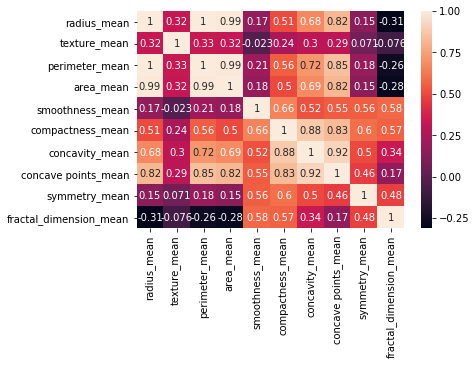

In [7]:
import seaborn as sns
%matplotlib inline
sns.heatmap(dataset.iloc[:,1:12].corr(),annot=True)